In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [111]:
df = pd.read_csv('../../Datasets/dataSetFinalML.csv', delimiter=';')

df.describe()

,hotel_ID,room_ID,num_noites,adultos,criancas,bebes,preco_euros,dif_data_chegada_data_reserva,quantidade,capacidade_maxima,capacidade_max_criancas,capacidade_max_bebes,estrelas,qtd_quartos,is_holiday,event_count,temperature_avg,temperature_max,temperature_min
count,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000,22228.000000
mean,390.515071,1941.739878,2.044718,2.026768,0.061049,0.018400,216.199093,22.862021,14.840471,2.552456,1.071576,0.497481,2.844475,62.800342,0.119759,0.039725,16.181786,22.097040,11.280776
std,115.450487,620.499171,1.758097,0.999687,0.293919,0.139328,287.338663,34.784771,19.554914,0.917034,1.043421,0.562744,1.381308,54.646023,0.324687,0.198515,4.920982,6.272823,4.836898
min,20.000000,81.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,7.300000,-2.400000
25%,310.000000,1407.000000,1.000000,2.000000,0.000000,0.000000,72.000000,2.000000,4.000000,2.000000,0.000000,0.000000,3.000000,23.000000,0.000000,0.000000,12.550000,17.000000,7.900000
50%,379.000000,1995.000000,1.000000,2.000000,0.000000,0.000000,120.000000,8.000000,8.000000,2.000000,1.000000,0.000000,3.000000,41.000000,0.000000,0.000000,16.100000,21.000000,11.600000
75%,494.000000,2444.000000,2.000000,2.000000,0.000000,0.000000,240.000000,29.000000,16.000000,3.000000,2.000000,1.000000,4.000000,84.000000,0.000000,0.000000,19.700000,26.000000,15.300000
max,561.000000,2897.000000,14.000000,30.000000,4.000000,3.000000,8078.000000,346.000000,90.000000,9.000000,8.000000,3.000000,5.000000,192.000000,1.000000,2.000000,34.700000,44.300000,25.700000


In [112]:
df['data_reserva'] = pd.to_datetime(df['data_reserva'])
df['data_chegada'] = pd.to_datetime(df['data_chegada'])
df['data_partida'] = pd.to_datetime(df['data_partida'])


In [113]:
df['ano_reserva'] = df['data_reserva'].dt.year
df['mes_reserva'] = df['data_reserva'].dt.month
df

,hotel_ID,pais,estado_reserva,room_ID,Q_tipo_quarto,rate_plan,data_reserva,data_chegada,data_partida,num_noites,...,estrelas,hora_max_checkin,qtd_quartos,is_holiday,event_count,temperature_avg,temperature_max,temperature_min,ano_reserva,mes_reserva
0,443,Canadá,Registado,2061,clssico standard,normal,2023-01-11 00:00:00+00:00,2023-02-21 00:00:00+00:00,2023-02-25 00:00:00+00:00,4,...,5,2023-05-20T23:59:00.000Z,42,1,0,11.420000,17.0,3.0,2023,1
1,321,Espanha,Registado,1417,duplo,bar,2022-07-10 00:00:00+00:00,2022-08-08 00:00:00+00:00,2022-08-09 00:00:00+00:00,1,...,3,2023-05-20T23:00:00.000Z,68,0,0,18.850000,23.1,16.1,2022,7
2,511,Alemanha,Registado,2394,duplo ou twin,direct,2023-03-05 00:00:00+00:00,2023-04-02 00:00:00+00:00,2023-04-08 00:00:00+00:00,6,...,0,2023-05-20T20:00:00.000Z,16,1,0,17.200000,23.0,12.8,2023,3
3,179,França,Registado,632,king confort,non-refundable,2022-12-21 00:00:00+00:00,2023-03-26 00:00:00+00:00,2023-03-27 00:00:00+00:00,1,...,4,2023-05-20T23:59:00.000Z,132,0,0,13.300000,20.5,7.8,2022,12
4,495,Portugal,Registado,2328,suite,bar,2022-07-20 00:00:00+00:00,2022-08-06 00:00:00+00:00,2022-08-08 00:00:00+00:00,2,...,0,2023-05-20T12:00:00.000Z,10,0,0,27.266667,35.6,16.0,2022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22223,482,Portugal,Registado,2285,t1,non-refundable,2022-11-05 00:00:00+00:00,2022-11-05 00:00:00+00:00,2022-11-06 00:00:00+00:00,1,...,4,2023-05-20T23:59:00.000Z,143,0,0,17.750000,21.1,15.2,2022,11
22224,535,Portugal,Pendente,2524,twin,website,2022-08-12 00:00:00+00:00,2022-09-08 00:00:00+00:00,2022-09-09 00:00:00+00:00,1,...,4,2023-05-20T23:55:00.000Z,11,0,0,20.850000,26.7,17.7,2022,8
22225,311,Portugal,Registado,1407,duplo standard,non-refundable,2022-09-14 00:00:00+00:00,2022-11-06 00:00:00+00:00,2022-11-07 00:00:00+00:00,1,...,3,2023-05-20T23:59:00.000Z,30,0,0,15.200000,19.0,11.0,2022,9
22226,313,França,Registado,1378,s i ii iii iv terrao privado,normal,2022-01-29 00:00:00+00:00,2022-02-26 00:00:00+00:00,2022-03-04 00:00:00+00:00,6,...,0,2023-05-20T19:00:00.000Z,13,1,0,14.600000,21.2,9.2,2022,1


In [114]:
df_cancelados = df[df['estado_reserva'] == 'Cancelado']

df_cancelados_2022 = df[(df['estado_reserva'] == 'Cancelado') & (df['ano_reserva'] == 2022)]
df_cancelados_2022

,hotel_ID,pais,estado_reserva,room_ID,Q_tipo_quarto,rate_plan,data_reserva,data_chegada,data_partida,num_noites,...,estrelas,hora_max_checkin,qtd_quartos,is_holiday,event_count,temperature_avg,temperature_max,temperature_min,ano_reserva,mes_reserva
19,483,Portugal,Cancelado,2289,familiar,clg flexible sin restricciones,2022-01-14 00:00:00+00:00,2022-02-02 00:00:00+00:00,2022-02-04 00:00:00+00:00,2,...,4,2023-05-20T23:59:00.000Z,98,0,0,9.166667,17.3,2.2,2022,1
27,179,Alemanha,Cancelado,1850,suite,room only,2022-06-01 00:00:00+00:00,2022-09-15 00:00:00+00:00,2022-09-21 00:00:00+00:00,6,...,4,2023-05-20T23:59:00.000Z,132,0,0,21.857143,29.2,17.1,2022,6
73,444,Estados Unidos,Cancelado,2074,duplo vista mar lateral,normal,2022-04-29 00:00:00+00:00,2022-06-12 00:00:00+00:00,2022-06-14 00:00:00+00:00,2,...,4,2023-05-20T23:59:00.000Z,77,0,0,20.433333,31.0,16.5,2022,4
74,444,Portugal,Cancelado,2077,familiar,normal,2022-05-31 00:00:00+00:00,2022-08-09 00:00:00+00:00,2022-08-10 00:00:00+00:00,1,...,4,2023-05-20T23:59:00.000Z,77,0,0,20.350000,25.0,16.0,2022,5
76,241,Estados Unidos,Cancelado,2178,superior,bar,2022-10-28 00:00:00+00:00,2022-12-17 00:00:00+00:00,2022-12-20 00:00:00+00:00,3,...,0,2023-05-20T20:00:00.000Z,25,0,0,15.875000,18.6,13.1,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22169,511,Portugal,Cancelado,2398,apartamento com 2 s,standard,2022-05-19 00:00:00+00:00,2022-06-25 00:00:00+00:00,2022-06-27 00:00:00+00:00,2,...,0,2023-05-20T20:00:00.000Z,16,0,0,20.333333,25.7,15.9,2022,5
22181,309,Portugal,Cancelado,2254,superior,mr main rate,2022-10-26 00:00:00+00:00,2022-10-27 00:00:00+00:00,2022-10-28 00:00:00+00:00,1,...,3,2023-05-20T23:59:00.000Z,41,0,0,18.400000,20.2,17.5,2022,10
22198,319,México,Cancelado,1416,suite,normal,2022-08-23 00:00:00+00:00,2022-09-04 00:00:00+00:00,2022-09-09 00:00:00+00:00,5,...,3,2023-05-20T23:59:00.000Z,96,0,0,19.650000,22.8,16.2,2022,8
22222,453,Portugal,Cancelado,2117,t1,reserva direta,2022-11-07 00:00:00+00:00,2022-11-07 00:00:00+00:00,2022-11-08 00:00:00+00:00,1,...,0,2023-05-20T23:59:00.000Z,9,0,0,14.900000,16.5,12.6,2022,11


In [115]:
cancelamentos_por_mes_ano = df_cancelados.groupby(['mes_reserva', 'ano_reserva']).size()

cancelamentos_por_mes = df_cancelados_2022.groupby(df_cancelados_2022['data_reserva'].dt.month)['quantidade'].count()
cancelamentos_por_mes

data_reserva
1     104
2     140
3     141
4     144
5     170
6     141
7     166
8     122
9      76
10     88
11     94
12     49
Name: quantidade, dtype: int64

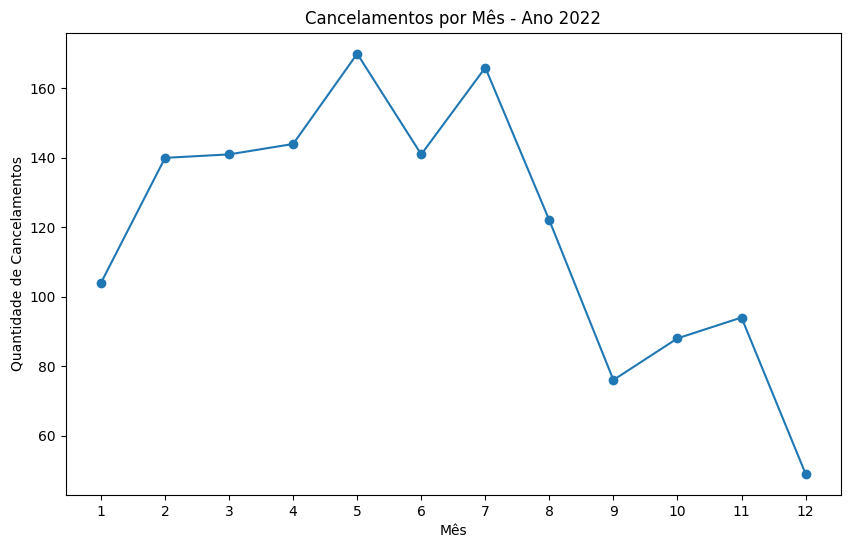

In [116]:
cancelamentos_por_mes.plot(kind='line', figsize=(10, 6), marker='o')
plt.xticks(cancelamentos_por_mes.index, cancelamentos_por_mes.index)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Cancelamentos')
plt.title('Cancelamentos por Mês - Ano 2022')
plt.show()


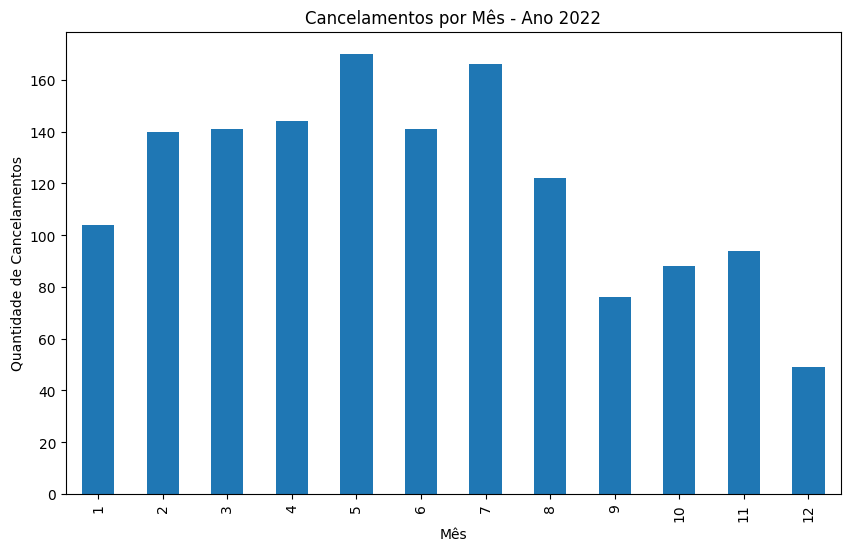

In [117]:
cancelamentos_por_mes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mês')
plt.ylabel('Quantidade de Cancelamentos')
plt.title('Cancelamentos por Mês - Ano 2022')
plt.show()

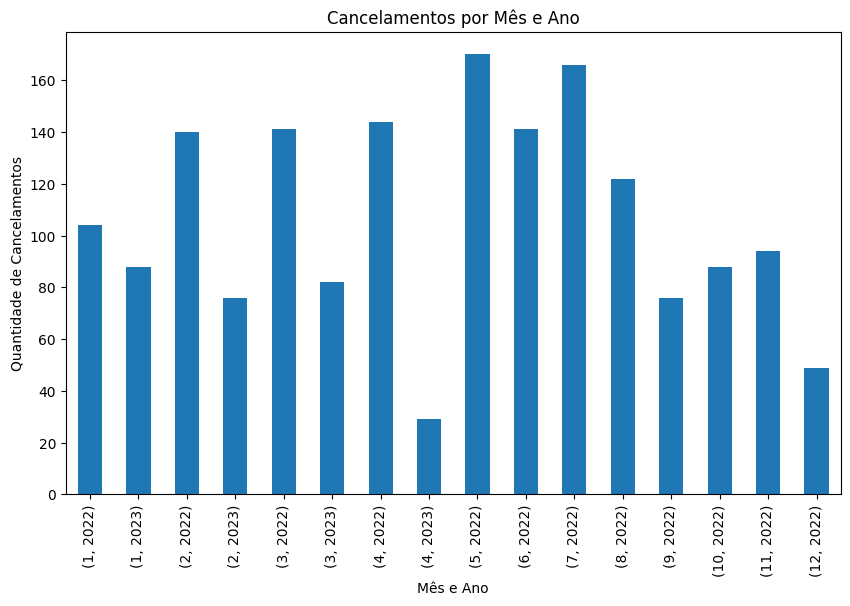

In [118]:
cancelamentos_por_mes_ano.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mês e Ano')
plt.ylabel('Quantidade de Cancelamentos')
plt.title('Cancelamentos por Mês e Ano')
plt.show()

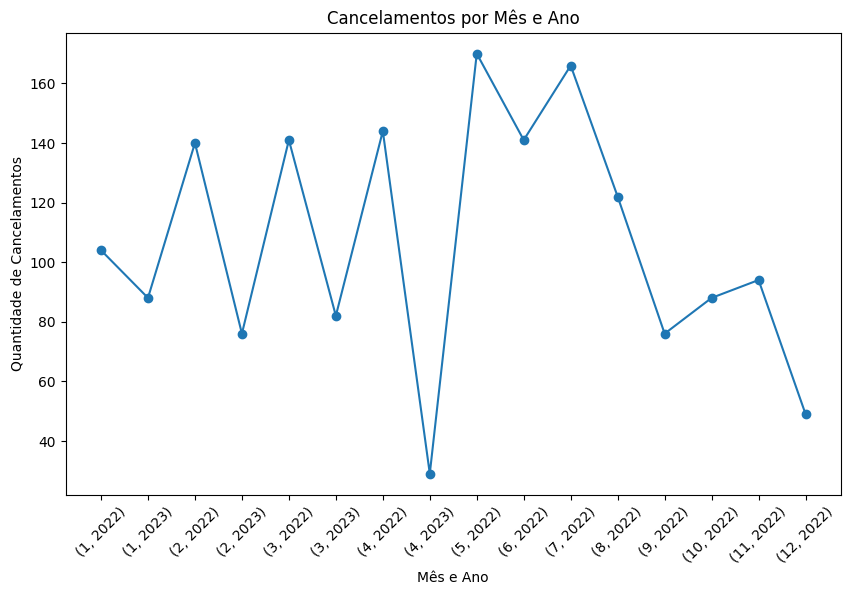

In [119]:
cancelamentos_por_mes_ano.plot(kind='line', figsize=(10, 6), marker='o')
plt.xlabel('Mês e Ano')
plt.ylabel('Quantidade de Cancelamentos')
plt.title('Cancelamentos por Mês e Ano')
plt.xticks(range(len(cancelamentos_por_mes_ano.index)), cancelamentos_por_mes_ano.index, rotation=45)
plt.show()